In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<AxesSubplot:ylabel='Species'>

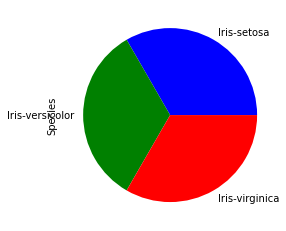

In [7]:
df['Species'].value_counts().plot(kind='pie',colors = ['blue', 'green', 'red'])

In [8]:
df.duplicated().sum()

0

In [10]:
X=df.drop(['Species'],axis=1).values 
Y=df['Species'].values

In [11]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [12]:
df['Species']=le.fit_transform(df['Species'])

In [13]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
40,41,5.0,3.5,1.3,0.3,0
72,73,6.3,2.5,4.9,1.5,1
123,124,6.3,2.7,4.9,1.8,2
41,42,4.5,2.3,1.3,0.3,0
144,145,6.7,3.3,5.7,2.5,2


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc=RandomForestClassifier(random_state=42)

In [18]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred=rfc.predict(X_test)

In [20]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-virginica' 'Iris-virgin

In [21]:
from sklearn.metrics import classification_report, accuracy_score 
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


In [22]:
report = classification_report(y_test, y_pred) 
print(f'Classification Report:\n{report}')

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



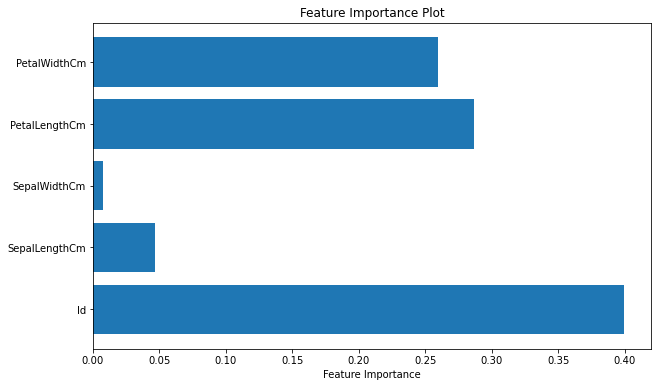

In [25]:
importances = rfc.feature_importances_
feature_names = df.columns[:-1] # Assuming the last column is the target

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center') 
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot') 
plt.show()


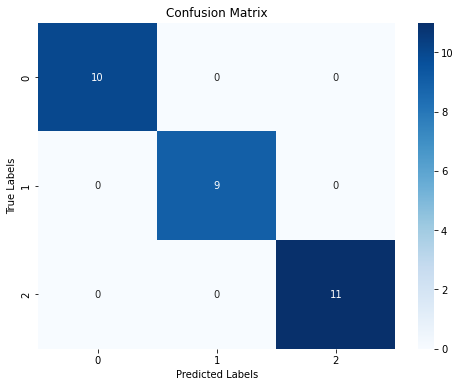

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix') 
plt.show()


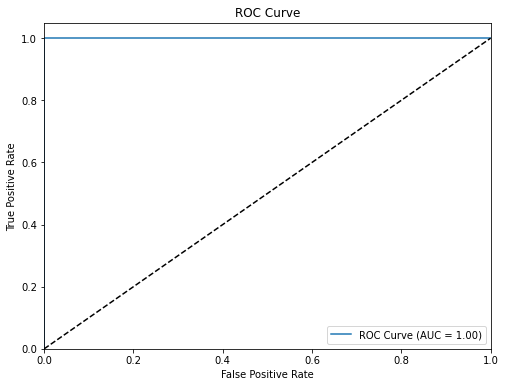

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming binary classification (e.g., for 'Iris-setosa' vs. 'Others')
y_setosa_binary = np.where(y_test == 'Iris-setosa', 1, 0) 
y_pred_setosa_proba = rfc.predict_proba(X_test)[:, 0]

fpr, tpr, _ = roc_curve(y_setosa_binary, y_pred_setosa_proba) 
auc = roc_auc_score(y_setosa_binary, y_pred_setosa_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})') 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right') 
plt.show()
